In [ ]:
! pip install tensorflow

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv(r'final_df.csv')
df.set_index('lat_long', inplace=True)
df.fillna(0, inplace=True)
df

,2000-02-18,2000-03-05,2000-03-21,2000-04-06,2000-04-22,2000-05-08,2000-05-24,2000-06-09,2000-06-25,2000-07-11,...,2024-01-01,2024-01-17,2024-02-02,2024-02-18,2024-03-05,2024-03-21,2024-04-06,2024-04-22,2024-05-08,2024-05-24
lat_long,,,,,,,,,,,,,,,,,,,,,
"0.45703193185870356,40.197005160631605",2734,2668,2760,2385,540,3342,2819,2931,2575,2527,...,4524,3645,3339,3072,2560,2602,4564,5061,4797,3677
"0.4544397303738519,40.197271389099406",2603,2539,2430,1971,2737,2546,2336,1714,2079,1917,...,3607,2811,2635,2602,2421,2505,3292,4402,3623,2786
"0.45184747636337713,40.197537606799045",3135,3132,3204,5097,5192,4158,3646,3595,3093,2455,...,4896,4056,3420,2820,3020,2617,4711,5467,5335,3836
"0.44925516982216074,40.197803813731184",3165,3040,2945,5121,2703,4794,3336,3339,2749,2594,...,4189,3392,3208,2851,2766,2956,3863,4086,4038,3782
"0.4466628107451197,40.19807000989648",2930,2781,2735,4320,4371,3452,3230,3098,2747,2534,...,4309,3367,3096,2817,2880,2927,4557,4864,4155,4001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"-0.09850324485499101,39.76985525248099",0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,3,0,0,0,0
"-0.10110493421799299,39.77012893321677",0,0,0,3,1,1,0,1,0,0,...,0,0,0,0,1,3,0,1,0,0
"-0.1037066772132266,39.77040260293766",0,0,0,1,3,0,0,1,0,0,...,0,0,3,3,3,3,0,1,0,1


In [12]:
df2 = df.copy()
df2 = df2.T
data = df2.values
data

array([[2734, 2603, 3135, ...,    0,    0,    0],
       [2668, 2539, 3132, ...,    0,    0,    0],
       [2760, 2430, 3204, ...,    0,    0,    0],
       ...,
       [5061, 4402, 5467, ...,    1,    1,    0],
       [4797, 3623, 5335, ...,    0,    0,    0],
       [3677, 2786, 3836, ...,    1,    1,    0]])

In [13]:
# Number of time steps to look back
n_steps = 4

# Split into input (X) and output (y) variables
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data[i:i + n_steps])
    y.append(data[i + n_steps])

X, y = np.array(X), np.array(y)

In [14]:
X

array([[[2734, 2603, 3135, ...,    0,    0,    0],
        [2668, 2539, 3132, ...,    0,    0,    0],
        [2760, 2430, 3204, ...,    0,    0,    0],
        [2385, 1971, 5097, ...,    1,    1,    3]],

       [[2668, 2539, 3132, ...,    0,    0,    0],
        [2760, 2430, 3204, ...,    0,    0,    0],
        [2385, 1971, 5097, ...,    1,    1,    3],
        [ 540, 2737, 5192, ...,    3,    3,    1]],

       [[2760, 2430, 3204, ...,    0,    0,    0],
        [2385, 1971, 5097, ...,    1,    1,    3],
        [ 540, 2737, 5192, ...,    3,    3,    1],
        [3342, 2546, 4158, ...,    0,    1,    1]],

       ...,

       [[3072, 2602, 2820, ...,    3,    0,    0],
        [2560, 2421, 3020, ...,    3,    0,    0],
        [2602, 2505, 2617, ...,    3,    3,    3],
        [4564, 3292, 4711, ...,    0,    1,    0]],

       [[2560, 2421, 3020, ...,    3,    0,    0],
        [2602, 2505, 2617, ...,    3,    3,    3],
        [4564, 3292, 4711, ...,    0,    1,    0],
        [5

In [15]:
y

array([[ 540, 2737, 5192, ...,    3,    3,    1],
       [3342, 2546, 4158, ...,    0,    1,    1],
       [2819, 2336, 3646, ...,    0,    0,    0],
       ...,
       [5061, 4402, 5467, ...,    1,    1,    0],
       [4797, 3623, 5335, ...,    0,    0,    0],
       [3677, 2786, 3836, ...,    1,    1,    0]])

In [16]:
# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(X_train.shape[2]))  # Output layer with number of features (number of coordinates)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 20134428.0000
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 19026886.0000
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 20326954.0000
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 20609648.0000
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 20577778.0000
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 19597614.0000
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 19804266.0000
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 19243254.0000
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 19208878.0000
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 19211376.0000
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 19320502.0000
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 18827070.0000
Epoch 13/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 20272634.0000
Epoch 14/500
14/14 ━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Squared Error (MSE) on Test Set: 16255553.639676478
mean_absolute_percentage_error (MAPE) on Test Set: 483313897538809.2


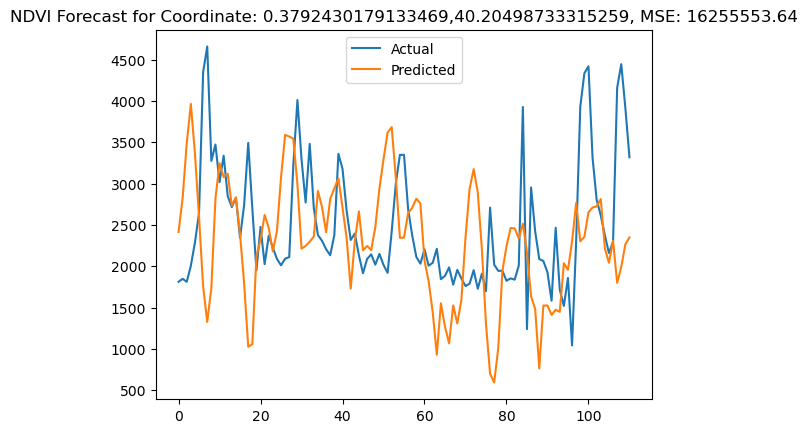

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

predicted = model.predict(X_test)

# Inverse transform the predictions to the original scale
# predicted_inversed = scaler.inverse_transform(predicted)

# Compute MSE on test set
mse = mean_squared_error(y_test, predicted)
mape = mean_absolute_percentage_error(y_test, predicted)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'mean_absolute_percentage_error (MAPE) on Test Set: {mape}')

# Plotting predictions for a sample coordinate
sample_index = 30  # Index of the coordinate to visualize
plt.plot(y_test[:, sample_index], label='Actual')
plt.plot(predicted[:, sample_index], label='Predicted')
plt.legend()
plt.title(f'NDVI Forecast for Coordinate: {df2.columns[sample_index]}, MSE: {mse:.2f}')
plt.show()

In [43]:
y_test

array([[2194, 1986, 2509, ...,    1,    1,    0],
       [2112, 1850, 2088, ...,    0,    0,    1],
       [2182, 1983, 2287, ...,    0,    0,    0],
       ...,
       [5061, 4402, 5467, ...,    1,    1,    0],
       [4797, 3623, 5335, ...,    0,    0,    0],
       [3677, 2786, 3836, ...,    1,    1,    0]])

In [42]:
predicted

array([[ 2.6482061e+03,  2.3096404e+03,  2.9438401e+03, ...,
         1.3780851e+00, -1.2383281e-01,  1.6095557e+00],
       [ 3.0997058e+03,  2.7033828e+03,  3.4457830e+03, ...,
         1.6164736e+00, -1.3690290e-01,  1.8860745e+00],
       [ 3.8237981e+03,  3.3348469e+03,  4.2507729e+03, ...,
         1.9987887e+00, -1.5786405e-01,  2.3295417e+00],
       ...,
       [ 2.1825295e+03,  1.9035343e+03,  2.4261365e+03, ...,
         1.1322114e+00, -1.1035232e-01,  1.3243542e+00],
       [ 2.4839705e+03,  2.1664141e+03,  2.7612556e+03, ...,
         1.2913699e+00, -1.1907849e-01,  1.5089703e+00],
       [ 2.5741865e+03,  2.2450896e+03,  2.8615508e+03, ...,
         1.3390034e+00, -1.2169008e-01,  1.5642228e+00]], dtype=float32)

In [52]:
actual = 2509
predicted = 2943

In [54]:
import numpy as np
print(f'''MAPE for one point coordinate: {np.abs((actual - predicted)/actual) * 100}''')
print(f'''Accuracy Percentage : {100 - np.abs((actual - predicted)/actual) * 100}''')

MAPE for one point coordinate: 17.297728178557197
Accuracy Percentage : 82.7022718214428
